In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
import pickle
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')

# EDA - Holiday

In [ ]:
df_holiday=pd.read_csv("holidays_events.csv")
df_holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [ ]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [ ]:
df_holiday.dtypes

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

In [ ]:
df_holiday.shape

(350, 6)

In [ ]:
df_holiday.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [ ]:
df_holiday['date'].value_counts()

2014-06-25    4
2017-06-25    3
2016-06-25    3
2015-06-25    3
2013-06-25    3
             ..
2014-07-13    1
2014-07-12    1
2014-07-09    1
2014-07-08    1
2017-12-26    1
Name: date, Length: 312, dtype: int64

In [ ]:
df_holiday['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [ ]:
df_holiday['locale'].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64

In [ ]:
df_holiday['locale_name'].value_counts()

Ecuador                           174
Quito                              13
Riobamba                           12
Guaranda                           12
Latacunga                          12
Ambato                             12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Salinas                             6
Loja                                6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Quevedo                             6
Manta                               6
Esmeraldas                          6
Cotopaxi                            6
El Carmen                           6
Santo Domingo                       6
Machala                             6
Imbabura                            6
Puyo                                6
Libertad                            6
Cayambe                             6
Name: locale_name, dtype: int64

In [ ]:
df_holiday['description'].value_counts()

Carnaval                              10
Fundacion de Cuenca                    7
Fundacion de Ibarra                    7
Fundacion de Quito                     6
Provincializacion de Santo Domingo     6
                                      ..
Terremoto Manabi+8                     1
Recupero puente Navidad                1
Terremoto Manabi+10                    1
Terremoto Manabi+11                    1
Traslado Fundacion de Quito            1
Name: description, Length: 103, dtype: int64

In [ ]:
df_holiday['transferred'].value_counts()

False    338
True      12
Name: transferred, dtype: int64

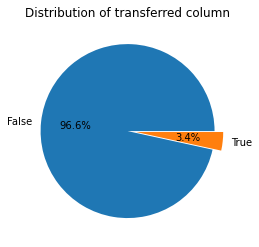

In [ ]:
x_df = df_holiday['transferred'].value_counts()
x_df.plot.pie(explode = [0,0.1], autopct = '%1.1f%%', shadow = False)
plt.title("Distribution of transferred column")
plt.ylabel('')
plt.show()

Text(0.5, 1.0, 'Transferred Holidays for each locale')

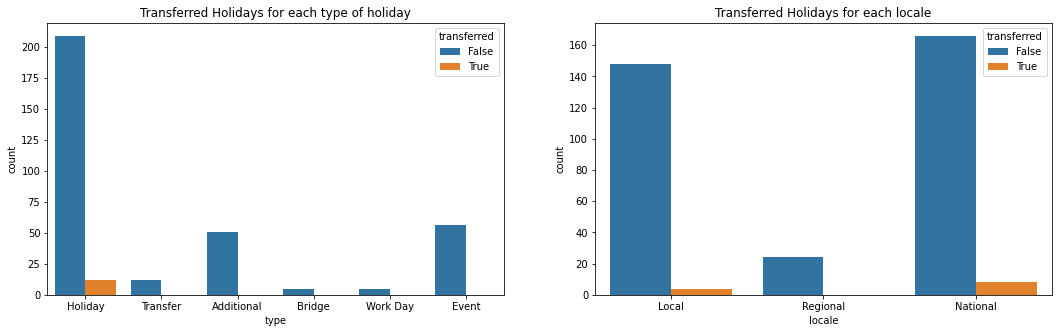

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (18, 5))
sns.countplot(ax = axes[0], data = df_holiday, x = 'type', hue = 'transferred')
axes[0].set_title('Transferred Holidays for each type of holiday')
sns.countplot(ax = axes[1], data = df_holiday, x = 'locale', hue = 'transferred')
axes[1].set_title('Transferred Holidays for each locale')

# EDA - Oil

In [ ]:
df_oil=pd.read_csv("oil.csv")
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [ ]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
df_oil.shape

(1218, 2)

In [ ]:
df_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [ ]:
df_oil=df_oil.fillna(method="backfill")
df_oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [ ]:
df_oil

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


# EDA - Store

In [ ]:
df_store=pd.read_csv("stores.csv")
df_store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
df_store.shape

(54, 5)

In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [ ]:
df_store.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [ ]:
df_store['city'].value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

In [ ]:
df_store['state'].value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

In [ ]:
df_store['type'].value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

In [ ]:
df_store['cluster'].value_counts()

3     7
6     6
10    6
15    5
13    4
14    4
11    3
4     3
8     3
1     3
9     2
7     2
2     2
12    1
5     1
16    1
17    1
Name: cluster, dtype: int64

# EDA - Transactions

In [ ]:
df_tran=pd.read_csv("transactions.csv")
df_tran

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [ ]:
df_tran.shape

(83488, 3)

In [ ]:
df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [ ]:
df_tran.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [ ]:
df_tran['date'].value_counts()

2017-08-15    54
2017-06-02    54
2017-05-21    54
2017-05-22    54
2017-05-23    54
              ..
2016-01-04    14
2014-01-01     2
2017-01-01     1
2015-01-01     1
2013-01-01     1
Name: date, Length: 1682, dtype: int64

In [ ]:
df_tran['store_nbr'].value_counts()

39    1678
38    1678
26    1678
31    1678
33    1678
34    1678
37    1678
27    1677
28    1677
32    1677
23    1677
40    1677
41    1677
44    1677
45    1677
46    1677
47    1677
48    1677
50    1677
51    1677
49    1677
2     1677
16    1677
5     1677
54    1676
3     1676
4     1676
6     1676
8     1676
9     1676
19    1676
35    1676
13    1676
1     1676
15    1676
11    1676
10    1675
7     1675
17    1674
43    1672
30    1655
14    1638
12    1616
25    1615
24    1577
18    1566
36    1551
53    1167
20     909
29     874
21     748
42     720
22     671
52     118
Name: store_nbr, dtype: int64

In [ ]:
df_tran['date'] = pd.to_datetime(df_tran['date'])
df_tran['date_str'] = df_tran['date'].astype(str)
df_tran['year_month'] = df_tran['date_str'].str.slice(0,7)

In [ ]:
df_tran

,date,store_nbr,transactions,date_str,year_month
0,2013-01-01,25,770,2013-01-01,2013-01
1,2013-01-02,1,2111,2013-01-02,2013-01
2,2013-01-02,2,2358,2013-01-02,2013-01
3,2013-01-02,3,3487,2013-01-02,2013-01
4,2013-01-02,4,1922,2013-01-02,2013-01
...,...,...,...,...,...
83483,2017-08-15,50,2804,2017-08-15,2017-08
83484,2017-08-15,51,1573,2017-08-15,2017-08
83485,2017-08-15,52,2255,2017-08-15,2017-08
83486,2017-08-15,53,932,2017-08-15,2017-08


In [ ]:
trans = df_tran[['year_month', 'transactions']].groupby('year_month').mean()
trans = trans.reset_index()

In [ ]:
df_tran

,date,store_nbr,transactions,date_str,year_month
0,2013-01-01,25,770,2013-01-01,2013-01
1,2013-01-02,1,2111,2013-01-02,2013-01
2,2013-01-02,2,2358,2013-01-02,2013-01
3,2013-01-02,3,3487,2013-01-02,2013-01
4,2013-01-02,4,1922,2013-01-02,2013-01
...,...,...,...,...,...
83483,2017-08-15,50,2804,2017-08-15,2017-08
83484,2017-08-15,51,1573,2017-08-15,2017-08
83485,2017-08-15,52,2255,2017-08-15,2017-08
83486,2017-08-15,53,932,2017-08-15,2017-08


# Reading Test and Train data

In [ ]:
df_test=pd.read_csv("test.csv")
test=df_test
df_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [ ]:
df_train=pd.read_csv("train.csv")
train=df_train
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [ ]:
df_submission=pd.read_csv("sample_submission.csv")
df_submission

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


# Training and Testing Data Cleaning

In [ ]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
df_train['date']= pd.to_datetime(df_train['date'],format="%Y-%m-%d")
df_train['year']=df_train['date'].apply(lambda X: X.year)
df_train['month']=df_train['date'].apply(lambda X: X.month)
df_train['day']=df_train['date'].apply(lambda X: X.day)
df_train=df_train.drop(['date'],axis=1)

df_test['date']= pd.to_datetime(df_test['date'],format="%Y-%m-%d")
df_test['year']=df_test['date'].apply(lambda X: X.year)
df_test['month']=df_test['date'].apply(lambda X: X.month)
df_test['day']=df_test['date'].apply(lambda X: X.day)
df_test=df_test.drop(['date'],axis=1)

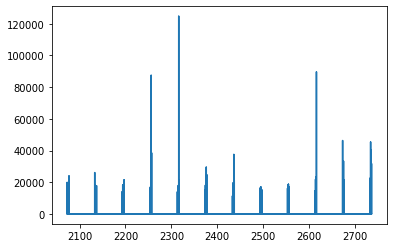

In [ ]:
X_data=df_train['year']+ df_train['month'].multiply(other = 30)+df_train['month'].multiply(other=30)
plt.plot(X_data,df_train['sales'])

# Preprocessing with label encoding for Family

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df_train['family'])
df_train['family']= label_encoder.transform(df_train['family'])

df_test['family']= label_encoder.transform(df_test['family'])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       int64  
 3   sales        float64
 4   onpromotion  int64  
 5   year         int64  
 6   month        int64  
 7   day          int64  
dtypes: float64(1), int64(7)
memory usage: 183.2 MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           28512 non-null  int64
 1   store_nbr    28512 non-null  int64
 2   family       28512 non-null  int64
 3   onpromotion  28512 non-null  int64
 4   year         28512 non-null  int64
 5   month        28512 non-null  int64
 6   day          28512 non-null  int64
dtypes: int64(7)
memory usage: 1.5 MB


In [ ]:
df_train.describe()

,id,store_nbr,family,sales,onpromotion,year,month,day
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,1.600000e+01,3.577757e+02,2.602770e+00,2.014838e+03,6.207838e+00,1.563005e+01
std,8.662819e+05,1.558579e+01,9.521906e+00,1.101998e+03,1.221888e+01,1.345518e+00,3.385668e+00,8.794789e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00
25%,7.502218e+05,1.400000e+01,8.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,3.000000e+00,8.000000e+00
50%,1.500444e+06,2.750000e+01,1.600000e+01,1.100000e+01,0.000000e+00,2.015000e+03,6.000000e+00,1.600000e+01
75%,2.250665e+06,4.100000e+01,2.400000e+01,1.958473e+02,0.000000e+00,2.016000e+03,9.000000e+00,2.300000e+01
max,3.000887e+06,5.400000e+01,3.200000e+01,1.247170e+05,7.410000e+02,2.017000e+03,1.200000e+01,3.100000e+01


In [ ]:
df_test.describe()

,id,store_nbr,family,onpromotion,year,month,day
count,2.851200e+04,28512.000000,28512.000000,28512.000000,28512.0,28512.0,28512.000000
mean,3.015144e+06,27.500000,16.000000,6.965383,2017.0,8.0,23.500000
std,8.230850e+03,15.586057,9.522072,20.683952,0.0,0.0,4.609853
min,3.000888e+06,1.000000,0.000000,0.000000,2017.0,8.0,16.000000
25%,3.008016e+06,14.000000,8.000000,0.000000,2017.0,8.0,19.750000
50%,3.015144e+06,27.500000,16.000000,0.000000,2017.0,8.0,23.500000
75%,3.022271e+06,41.000000,24.000000,6.000000,2017.0,8.0,27.250000
max,3.029399e+06,54.000000,32.000000,646.000000,2017.0,8.0,31.000000


# Split data in X_train,y_train, X_test

In [ ]:
y_train=df_train['sales']
X_train=df_train.drop(['id','sales'],axis=1)
X_test=df_test.drop(['id'],axis=1)
X_train.head()

,store_nbr,family,onpromotion,year,month,day
0,1,0,0,2013,1,1
1,1,1,0,2013,1,1
2,1,2,0,2013,1,1
3,1,3,0,2013,1,1
4,1,4,0,2013,1,1


# Scalling the data for better result

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# min max scaling the variables
scaler =  MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((3000888, 6), (28512, 6))

# Linear Regression - 3.09741

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# training of linear regression model
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_test = regressor.predict(X_test)

LR_CSV = pd.DataFrame({'id':df_test['id'], 'sales':y_test})
LR_CSV.to_csv('LR_CSV.csv', index=False)

# Random Forest - 0.53755

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [5],'max_features':[6],'max_depth':[100], 'min_samples_leaf':[1],'random_state':[42]} 
rf = RandomForestRegressor(n_jobs=-1)
rf_cv =  GridSearchCV(rf, param_grid)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_params_)

y_test=rf_cv.predict(X_test)
RF_CSV = pd.DataFrame({'id':df_test['id'], 'sales':y_test})
RF_CSV.to_csv('RF_CSV.csv', index=False)

# Ridge regression - 3.09384

In [ ]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha =0.05)
ridgeR.fit(X_train,y_train)

y_test = ridgeR.predict(X_test)
RIDGE_CSV = pd.DataFrame({'id':df_test['id'], 'sales':y_test})
RIDGE_CSV.to_csv('RIDGE_CSV.csv', index=False)

# Lasso regression - 3.09441

In [ ]:
from sklearn.linear_model import Lasso 

lasso = Lasso(alpha =0.005)
lasso.fit(X_train,y_train)

y_test = lasso.predict(X_test)
LASSO_CSV = pd.DataFrame({'id':df_test['id'], 'sales':y_test})
LASSO_CSV.to_csv('LASSO_CSV.csv', index=False)

# SGDRegressor 3.31360

In [ ]:
from sklearn import linear_model

SGDr = linear_model.SGDRegressor()
SGDr.fit(X_train, y_train)

y_test = SGDr.predict(X_test)
SGD_CSV = pd.DataFrame({'id':df_test['id'], 'sales':y_test})
SGD_CSV.to_csv('SGD_CSV.csv', index=False)

# Support Vector Regression 2.0512

In [ ]:
from sklearn.svm import SVR 

SVRregressor = SVR() 
SVRregressor.fit(X_train, y_train)

y_test = SVRregressor.predict(X_test)
SVR_CSV = pd.DataFrame({'id':df_test['id'], 'sales':y_test})
SVR_CSV.to_csv('SVR_CSV.csv', index=False)

# XGB

In [ ]:
xgb_model = xgboost.XGBRegressor(max_depth = 18, n_estimators = 5, subsample = 0.7, 
                              colsample_bylevel = 0.5, learning_rate = 0.01)
xgb_model.fit(X_train, y_train, verbose = 1)

In [ ]:
predictions = xgb_model.predict(X_test)
predictions = [a if a > 0 else 0 for a in predictions]

In [ ]:
XGB_CSV = pd.DataFrame({'id':df_test['id'], 'sales':predictions})
XGB_CSV.to_csv('XGB_CSV.csv', index=False)

In [ ]:
xgb_model = xgboost.XGBRegressor(max_depth = 18, n_estimators = 11, subsample = 0.7, 
                              colsample_bylevel = 0.5, learning_rate = 0.01)
xgb_model.fit(X_train, y_train, verbose = 1)

predictions = xgb_model.predict(X_test)
predictions = [a if a > 0 else 0 for a in predictions]

XGB_CSV = pd.DataFrame({'id':df_test['id'], 'sales':predictions})
XGB_CSV.to_csv('XGB_CSV.csv', index=False)

# Time series Analysis

In [ ]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [ ]:
Family_list=df_train.family.unique()
Family_list

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [ ]:
store_nbr_list=df_train.store_nbr.unique()
store_nbr_list

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [ ]:
print('Number of Items:',len(Family_list))
print('Number of Stores:', len(store_nbr_list))

Number of Items: 33
Number of Stores: 54


In [ ]:
print("Total number of time series:", (len(Family_list)*len(store_nbr_list)))

Total number of time series: 1782


In [ ]:
df_train['date'] = pd.to_datetime(df_train.date,format='%Y-%m-%d')
df_train.index = df_train['date']

df_test['date'] = pd.to_datetime(df_test.date,format='%Y-%m-%d')
df_test.index = df_test['date']

In [ ]:
df_test.head()

,id,date,store_nbr,family,onpromotion
date,,,,,
2017-08-16,3000888,2017-08-16,1,AUTOMOTIVE,0
2017-08-16,3000889,2017-08-16,1,BABY CARE,0
2017-08-16,3000890,2017-08-16,1,BEAUTY,2
2017-08-16,3000891,2017-08-16,1,BEVERAGES,20
2017-08-16,3000892,2017-08-16,1,BOOKS,0


In [ ]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2013-01-01,0,2013-01-01,1,AUTOMOTIVE,0.0,0
2013-01-01,1,2013-01-01,1,BABY CARE,0.0,0
2013-01-01,2,2013-01-01,1,BEAUTY,0.0,0
2013-01-01,3,2013-01-01,1,BEVERAGES,0.0,0
2013-01-01,4,2013-01-01,1,BOOKS,0.0,0


# ARIMA / SARIMA 0.49313

In [ ]:
plt.figure(figsize=(100,10))
Temp=df_train[df_train['family']=='AUTOMOTIVE']
plt.plot(Temp[df_train['store_nbr']==1]['date'],df_train[df_train['family']=='AUTOMOTIVE'][df_train['store_nbr']==1]['sales'])

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
Flag=1
Iterations=len(store_nbr_list) * len(Family_list)
NAME='3-1-1-3-1-1-12'+'ARIMA_CSV.csv'

for s in range(len(store_nbr_list)):
    
  for f in range(len(Family_list)):

    training=df_train[df_train['store_nbr']==store_nbr_list[s]]
    training=training[training['family']==Family_list[f]]

    print("***********************************************************************************************")
    print("{:.2f}".format((Flag*100)/Iterations),'% calculation completed')
    print("Training for", f, Family_list[f],'in store number',store_nbr_list[s], 'with number of observations',len(training))
    print("***********************************************************************************************")

    training_ip=training.drop(['id','date','store_nbr','family','onpromotion'],axis=1)


    model = SARIMAX(training_ip, order = (3, 1,1),seasonal_order =(3, 1,1, 12),simple_differencing=True)
    #model = ARIMA(training_ip, order=(3,1,1))
    model = model.fit()
    
    testing=df_test[df_test['family']==Family_list[f]]
    testing=testing[testing['store_nbr']==store_nbr_list[s]]

    predictions = model.predict(len(training_ip),len(training_ip)+len(testing)+1,typ = 'levels')
    Predictions=predictions[-17:-1]
    print('\nlen(testing)=',len(Predictions))
    print('\nLen Predictions=',len(Predictions))
    print('\nPredictions.values=\n',Predictions.values)
    forecast = pd.DataFrame(Predictions.values,index = testing.id,columns=['sales'])

    forecast.reset_index(inplace=True)

    if Flag==1:
      Final_op=forecast
    else:
      Final_op = pd.concat([Final_op,forecast])

    print('Length of Final_op is:', len(Final_op))
    print(Final_op)
    print("#####################################################################################")

    Flag+=1


    del training,training_ip,model,testing,Predictions,forecast
    Final_op.to_csv(NAME, index=False)

# Auto Arima 0.67305

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

In [ ]:
Flag=1
store_nbr_txt= open("store_nbr.txt","w+")
Family_list_txt= open("Family_list.txt","w+")
Iterations=len(store_nbr_list) * len(Family_list)

for s in range(len(store_nbr_list)):
  for f in range(len(Family_list)):
    training=df_train[df_train['store_nbr']==store_nbr_list[s]]
    training=training[training['family']==Family_list[f]]
    print("***********************************************************************************************")
    print(((Flag*100)/Iterations),'% calculation completed')
    print("Training for", Family_list[f],'in store number',store_nbr_list[s], 'with number of observations',len(training))
    print("***********************************************************************************************")
    
    training_ip=training.drop(['id','date','store_nbr','family','onpromotion'],axis=1)

    model = auto_arima(training_ip,start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
    model.fit(training_ip)

    testing=df_test[df_test['family']==Family_list[f]]
    testing=testing[testing['store_nbr']==store_nbr_list[s]]

    Predictions=model.predict(n_periods=len(testing))
    forecast = pd.DataFrame(Predictions,index = testing.id,columns=['sales'])

    forecast.reset_index(inplace=True)

    if Flag==1:
      Final_op=forecast
    else:
      Final_op = pd.concat([Final_op,forecast])

    print('Length of Final_op is:', len(Final_op))
    print(Final_op)
    print("#####################################################################################")

    Flag+=1

    store_nbr_txt.write(str(store_nbr_list[s]))
    Family_list_txt.write(Family_list[f])


    del training,training_ip,model,testing,Predictions,forecast
    Final_op.to_csv('ARIMA_CSV.csv', index=False)
    
    
store_nbr_txt.close()
Family_list_txt.close()

# Using all data sets

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv')
transactions =  pd.read_csv('transactions.csv')
holidays = pd.read_csv('holidays_events.csv')

In [ ]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

train['year'] = train['date'].dt.year
test['year'] = test['date'].dt.year

train['month'] = train['date'].dt.month
test['month'] = test['date'].dt.month

train['dayofmonth'] = train['date'].dt.day
test['dayofmonth'] = test['date'].dt.day

train['dayofweek'] = train['date'].dt.dayofweek
test['dayofweek'] = test['date'].dt.dayofweek

train['dayname'] = train['date'].dt.strftime('%A')
test['dayname'] = test['date'].dt.strftime('%A')

In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dayname
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Tuesday


In [ ]:
train_trend = train.groupby(['year', 'family']).sum()[['sales']].reset_index(level = 0).reset_index(level = 0)[['year', 'family','sales']]
train_trend = train_trend.sort_values("sales", ascending = False).head(20)

In [ ]:
pip install -U kaleido

     |████████████████████████████████| 79.9 MB 128 kB/s 


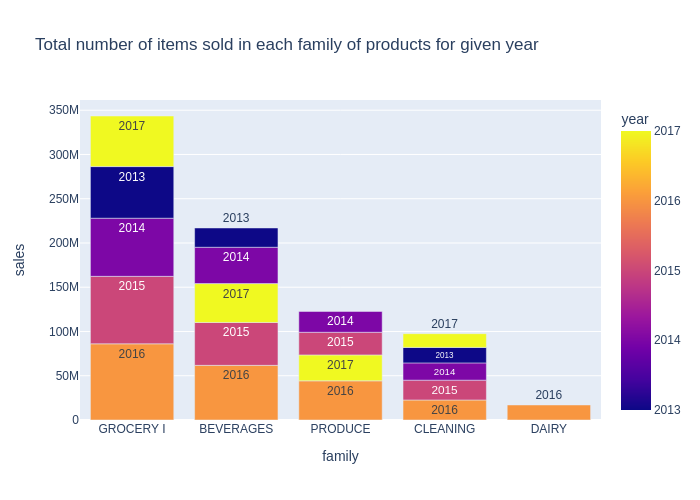

In [ ]:
fig = px.bar(train_trend, x = "family", y = "sales", color = "year", text = 'year',
            barmode = 'stack', title = "Total number of items sold in each family of products for given year")

fig.show("png")

In [ ]:
oil['date'] = pd.to_datetime(oil['date'])

In [ ]:
oil = oil.set_index('date').dcoilwtico.interpolate(method = 'linear').to_frame()
oil['date_str'] = oil.index.astype(str)

In [ ]:
oil['year_month'] = oil['date_str'].str.slice(0,7)
oil_trend = oil[['year_month', 'dcoilwtico']].groupby('year_month').mean()
oil_trend = oil_trend.reset_index()

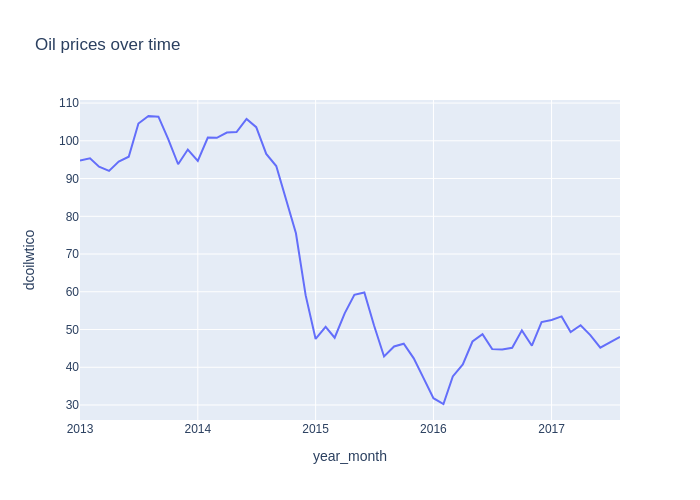

In [ ]:
fig = px.line(oil_trend, x = "year_month", y = "dcoilwtico", title = 'Oil prices over time')
fig.show("png")

In [ ]:
oil_trend.head()

,year_month,dcoilwtico
0,2013-01,94.806364
1,2013-02,95.359500
2,2013-03,93.140000
3,2013-04,92.021364
4,2013-05,94.498043


In [ ]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['date_str'] = transactions['date'].astype(str)
transactions['year_month'] = transactions['date_str'].str.slice(0,7)

In [ ]:
trans = transactions[['year_month', 'transactions']].groupby('year_month').mean()
trans = trans.reset_index()

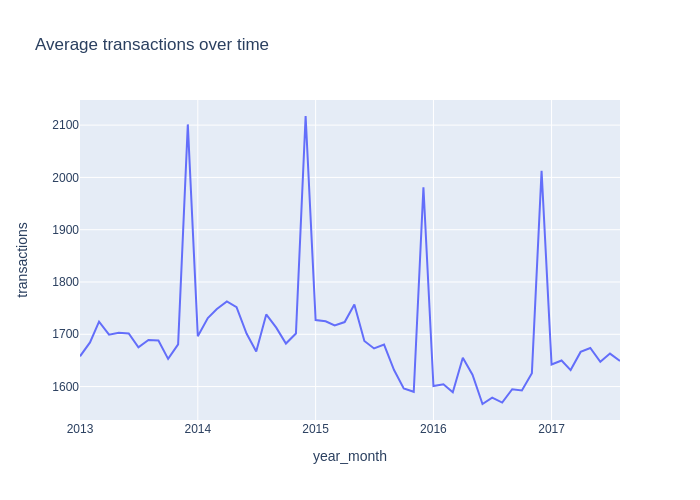

In [ ]:
fig = px.line(trans, x = "year_month", y = "transactions", title = 'Average transactions over time')
fig.show("png")

# Stores and Transactions

In [ ]:
store_trans = pd.merge(stores, transactions, how = 'left', on = 'store_nbr')
store_trans.head()

,store_nbr,city,state,type,cluster,date,transactions,date_str,year_month
0,1,Quito,Pichincha,D,13,2013-01-02,2111,2013-01-02,2013-01
1,1,Quito,Pichincha,D,13,2013-01-03,1833,2013-01-03,2013-01
2,1,Quito,Pichincha,D,13,2013-01-04,1863,2013-01-04,2013-01
3,1,Quito,Pichincha,D,13,2013-01-05,1509,2013-01-05,2013-01
4,1,Quito,Pichincha,D,13,2013-01-06,520,2013-01-06,2013-01


In [ ]:
store_trans = store_trans.groupby(['store_nbr', 'type']).sum()[['transactions']].reset_index(level = 0).reset_index(level = 0)[['store_nbr', 'type', 
                                                                                                'transactions']]
store_trans = store_trans.sort_values("transactions", ascending = False)

In [ ]:
fig = px.bar(store_trans, x = "store_nbr", y = "transactions", color = "type", text = 'type',
            barmode = 'stack', title = "Total number of transactions for each store")

fig.show()

# Train data

In [ ]:
train_trend = train.groupby(['year', 'family']).sum()[['sales']].reset_index(level = 0).reset_index(level = 0)[['year', 'family', 
                                                                                                'sales']]
train_trend = train_trend.sort_values("sales", ascending = False).head(20)

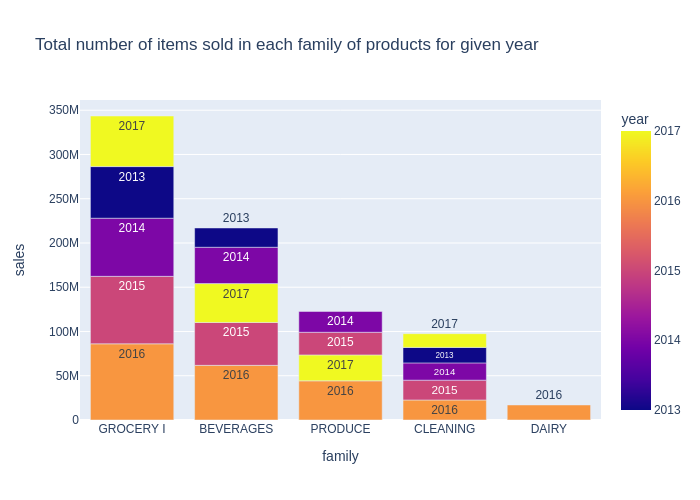

In [ ]:
fig = px.bar(train_trend, x = "family", y = "sales", color = "year", text = 'year',
            barmode = 'stack', title = "Total number of items sold in each family of products for given year")

fig.show("png")

# Joining train and oil dataset on date


In [ ]:
train['date_str'] = train['date'].astype(str)
train = pd.merge(train, oil, how = 'left', on = 'date_str')
train.drop(columns = 'date_str', axis = 1, inplace = True)

test['date_str'] = test['date'].astype(str)
test = pd.merge(test, oil, how = 'left', on = 'date_str')
test.drop(columns = 'date_str', axis = 1, inplace = True)

In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dayname,dcoilwtico,year_month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Tuesday,NaN,2013-01
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Tuesday,NaN,2013-01
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Tuesday,NaN,2013-01
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Tuesday,NaN,2013-01
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Tuesday,NaN,2013-01


# Joining train and store dataset on store number 

In [ ]:
train = pd.merge(train,stores, how = 'left', on = 'store_nbr')
test = pd.merge(test, stores, how = 'left', on = 'store_nbr')

In [ ]:
train["weekend"] = train['dayname']
train["workday"] = train['dayname']
test["weekend"] = test['dayname']
test["workday"] = test['dayname']

In [ ]:
train.drop(['dayname', "id"], axis = 1, inplace = True)
test.drop(['dayname', "id"], axis = 1, inplace = True)

In [ ]:
train.head() 

,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dcoilwtico,year_month,city,state,type,cluster,weekend,workday
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,NaN,2013-01,Quito,Pichincha,D,13,Tuesday,Tuesday
1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,NaN,2013-01,Quito,Pichincha,D,13,Tuesday,Tuesday
2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,NaN,2013-01,Quito,Pichincha,D,13,Tuesday,Tuesday
3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,NaN,2013-01,Quito,Pichincha,D,13,Tuesday,Tuesday
4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,NaN,2013-01,Quito,Pichincha,D,13,Tuesday,Tuesday


# Distinguishing weekdays and weekend

In [ ]:
train.loc[train['weekend'] == "Saturday", 'weekend'] = 1
train.loc[train['weekend'] == "Sunday", 'weekend'] = 1
train.loc[train['weekend'] == "Monday", 'weekend'] = 0
train.loc[train['weekend'] == "Tuesday", 'weekend'] = 0
train.loc[train['weekend'] == "Wednesday", 'weekend'] = 0
train.loc[train['weekend'] == "Thursday", 'weekend'] = 0
train.loc[train['weekend'] == "Friday", 'weekend'] = 0

train.loc[train['workday'] == "Saturday", 'workday'] = 0
train.loc[train['workday'] == "Sunday", 'workday'] = 0
train.loc[train['workday'] == "Monday", 'workday'] = 1
train.loc[train['workday'] == "Tuesday", 'workday'] = 1
train.loc[train['workday'] == "Wednesday", 'workday'] = 1
train.loc[train['workday'] == "Thursday", 'workday'] = 1
train.loc[train['workday'] == "Friday", 'workday'] = 1

test.loc[test['weekend'] == "Saturday", 'weekend'] = 1
test.loc[test['weekend'] == "Sunday", 'weekend'] = 1
test.loc[test['weekend'] == "Monday", 'weekend'] = 0
test.loc[test['weekend'] == "Tuesday", 'weekend'] = 0
test.loc[test['weekend'] == "Wednesday", 'weekend'] = 0
test.loc[test['weekend'] == "Thursday", 'weekend'] = 0
test.loc[test['weekend'] == "Friday", 'weekend'] = 0

test.loc[test['workday'] == "Saturday", 'workday'] = 0
test.loc[test['workday'] == "Sunday", 'workday'] = 0
test.loc[test['workday'] == "Monday", 'workday'] = 1
test.loc[test['workday'] == "Tuesday", 'workday'] = 1
test.loc[test['workday'] == "Wednesday", 'workday'] = 1
test.loc[test['workday'] == "Thursday", 'workday'] = 1
test.loc[test['workday'] == "Friday", 'workday'] = 1

In [ ]:
train['workday'] = train.workday.astype(int)
train['weekend'] = train.weekend.astype(int)

test['workday'] = test.workday.astype(int)
test['weekend'] = test.weekend.astype(int)

# Joining train and holidays on date

In [ ]:
train['date_str'] = train['date'].astype(str)
holidays['date_str'] = holidays['date'].astype(str)
train = pd.merge(train, holidays, how = 'left', on = 'date_str')
train.drop(columns = 'date_str', axis = 1, inplace = True)

test['date_str'] = test['date'].astype(str)
holidays['date_str'] = holidays['date'].astype(str)
test = pd.merge(test, holidays, how = 'left', on = 'date_str')
test.drop(columns = 'date_str', axis = 1, inplace = True)

In [ ]:
train = train.rename(columns = {"type_y": "holiday_type", "type_x": "store_type", "date_x": "date"})
train.drop(['date_y', 'year_month'], axis = 1, inplace = True)

In [ ]:
test = test.rename(columns = {"type_y": "holiday_type", "type_x": "store_type", "date_x": "date"})
test.drop(['date_y', 'year_month'], axis = 1, inplace = True)

In [ ]:
train.drop(['locale_name'], axis = 1, inplace = True)
train.drop(['description'], axis = 1, inplace = True)
test.drop(['locale_name'], axis = 1, inplace = True)
test.drop(['description'], axis = 1, inplace = True)

In [ ]:
train.sales = np.log1p(train.sales)

In [ ]:
train.head()

,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dcoilwtico,city,state,store_type,cluster,weekend,workday,holiday_type,locale,transferred
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,NaN,Quito,Pichincha,D,13,0,1,Holiday,National,False
1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,NaN,Quito,Pichincha,D,13,0,1,Holiday,National,False
2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,NaN,Quito,Pichincha,D,13,0,1,Holiday,National,False
3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,NaN,Quito,Pichincha,D,13,0,1,Holiday,National,False
4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,NaN,Quito,Pichincha,D,13,0,1,Holiday,National,False


In [ ]:
train['holiday_type'] = train['holiday_type'].replace(np.nan, "Not Holiday")
train['locale'] = train['locale'].replace(np.nan, "None")
train['transferred'] = train['transferred'].replace(np.nan, False)

In [ ]:
test['holiday_type'] = test['holiday_type'].replace(np.nan, "Not Holiday")
test['locale'] = test['locale'].replace(np.nan, "None")
test['transferred'] = test['transferred'].replace(np.nan, False)

In [ ]:
train.loc[train['transferred'] == False, 'transferred'] = 0
train.loc[train['transferred'] == True, 'transferred'] = 1

In [ ]:
test.loc[test['transferred'] == False, 'transferred'] = 0
test.loc[test['transferred'] == True, 'transferred'] = 1

In [ ]:
train['transferred'] = train.transferred.astype(int)
test['transferred'] = test.transferred.astype(int)

In [ ]:
test.isnull().sum()

date               0
store_nbr          0
family             0
onpromotion        0
year               0
month              0
dayofmonth         0
dayofweek          0
dcoilwtico      7128
city               0
state              0
store_type         0
cluster            0
weekend            0
workday            0
holiday_type       0
locale             0
transferred        0
dtype: int64

In [ ]:
mean_1_2013 = train[(train['year'] == 2013) & (train['month'] == 1)]['dcoilwtico'].mean(skipna = True)
mean_2_2013 = train[(train['year'] == 2013) & (train['month'] == 2)]['dcoilwtico'].mean(skipna = True)
mean_3_2013 = train[(train['year'] == 2013) & (train['month'] == 3)]['dcoilwtico'].mean(skipna = True)
mean_4_2013 = train[(train['year'] == 2013) & (train['month'] == 4)]['dcoilwtico'].mean(skipna = True)
mean_5_2013 = train[(train['year'] == 2013) & (train['month'] == 5)]['dcoilwtico'].mean(skipna = True)
mean_6_2013 = train[(train['year'] == 2013) & (train['month'] == 6)]['dcoilwtico'].mean(skipna = True)
mean_7_2013 = train[(train['year'] == 2013) & (train['month'] == 7)]['dcoilwtico'].mean(skipna = True)
mean_8_2013 = train[(train['year'] == 2013) & (train['month'] == 8)]['dcoilwtico'].mean(skipna = True)
mean_9_2013 = train[(train['year'] == 2013) & (train['month'] == 9)]['dcoilwtico'].mean(skipna = True)
mean_10_2013 = train[(train['year'] == 2013) & (train['month'] == 10)]['dcoilwtico'].mean(skipna = True)
mean_11_2013 = train[(train['year'] == 2013) & (train['month'] == 11)]['dcoilwtico'].mean(skipna = True)
mean_12_2013 = train[(train['year'] == 2013) & (train['month'] == 12)]['dcoilwtico'].mean(skipna = True)

train.loc[(train['year'] == 2013) & (train['month'] == 1), "dcoilwtico"] = mean_1_2013
train.loc[(train['year'] == 2013) & (train['month'] == 2), "dcoilwtico"] = mean_2_2013
train.loc[(train['year'] == 2013) & (train['month'] == 3), "dcoilwtico"] = mean_3_2013
train.loc[(train['year'] == 2013) & (train['month'] == 4), "dcoilwtico"] = mean_4_2013
train.loc[(train['year'] == 2013) & (train['month'] == 5), "dcoilwtico"] = mean_5_2013
train.loc[(train['year'] == 2013) & (train['month'] == 6), "dcoilwtico"] = mean_6_2013
train.loc[(train['year'] == 2013) & (train['month'] == 7), "dcoilwtico"] = mean_7_2013
train.loc[(train['year'] == 2013) & (train['month'] == 8), "dcoilwtico"] = mean_8_2013
train.loc[(train['year'] == 2013) & (train['month'] == 9), "dcoilwtico"] = mean_9_2013
train.loc[(train['year'] == 2013) & (train['month'] == 10), "dcoilwtico"] = mean_10_2013
train.loc[(train['year'] == 2013) & (train['month'] == 11), "dcoilwtico"] = mean_11_2013
train.loc[(train['year'] == 2013) & (train['month'] == 12), "dcoilwtico"] = mean_12_2013

In [ ]:
mean_1_2014 = train[(train['year'] == 2014) & (train['month'] == 1)]['dcoilwtico'].mean(skipna = True)
mean_2_2014 = train[(train['year'] == 2014) & (train['month'] == 2)]['dcoilwtico'].mean(skipna = True)
mean_3_2014 = train[(train['year'] == 2014) & (train['month'] == 3)]['dcoilwtico'].mean(skipna = True)
mean_4_2014 = train[(train['year'] == 2014) & (train['month'] == 4)]['dcoilwtico'].mean(skipna = True)
mean_5_2014 = train[(train['year'] == 2014) & (train['month'] == 5)]['dcoilwtico'].mean(skipna = True)
mean_6_2014 = train[(train['year'] == 2014) & (train['month'] == 6)]['dcoilwtico'].mean(skipna = True)
mean_7_2014 = train[(train['year'] == 2014) & (train['month'] == 7)]['dcoilwtico'].mean(skipna = True)
mean_8_2014 = train[(train['year'] == 2014) & (train['month'] == 8)]['dcoilwtico'].mean(skipna = True)
mean_9_2014 = train[(train['year'] == 2014) & (train['month'] == 9)]['dcoilwtico'].mean(skipna = True)
mean_10_2014 = train[(train['year'] == 2014) & (train['month'] == 10)]['dcoilwtico'].mean(skipna = True)
mean_11_2014 = train[(train['year'] == 2014) & (train['month'] == 11)]['dcoilwtico'].mean(skipna = True)
mean_12_2014 = train[(train['year'] == 2014) & (train['month'] == 12)]['dcoilwtico'].mean(skipna = True)

train.loc[(train['year'] == 2014) & (train['month'] == 1), "dcoilwtico"] = mean_1_2014
train.loc[(train['year'] == 2014) & (train['month'] == 2), "dcoilwtico"] = mean_2_2014
train.loc[(train['year'] == 2014) & (train['month'] == 3), "dcoilwtico"] = mean_3_2014
train.loc[(train['year'] == 2014) & (train['month'] == 4), "dcoilwtico"] = mean_4_2014
train.loc[(train['year'] == 2014) & (train['month'] == 5), "dcoilwtico"] = mean_5_2014
train.loc[(train['year'] == 2014) & (train['month'] == 6), "dcoilwtico"] = mean_6_2014
train.loc[(train['year'] == 2014) & (train['month'] == 7), "dcoilwtico"] = mean_7_2014
train.loc[(train['year'] == 2014) & (train['month'] == 8), "dcoilwtico"] = mean_8_2014
train.loc[(train['year'] == 2014) & (train['month'] == 9), "dcoilwtico"] = mean_9_2014
train.loc[(train['year'] == 2014) & (train['month'] == 10), "dcoilwtico"] = mean_10_2014
train.loc[(train['year'] == 2014) & (train['month'] == 11), "dcoilwtico"] = mean_11_2014
train.loc[(train['year'] == 2014) & (train['month'] == 12), "dcoilwtico"] = mean_12_2014

In [ ]:
mean_1_2015 = train[(train['year'] == 2015) & (train['month'] == 1)]['dcoilwtico'].mean(skipna = True)
mean_2_2015 = train[(train['year'] == 2015) & (train['month'] == 2)]['dcoilwtico'].mean(skipna = True)
mean_3_2015 = train[(train['year'] == 2015) & (train['month'] == 3)]['dcoilwtico'].mean(skipna = True)
mean_4_2015 = train[(train['year'] == 2015) & (train['month'] == 4)]['dcoilwtico'].mean(skipna = True)
mean_5_2015 = train[(train['year'] == 2015) & (train['month'] == 5)]['dcoilwtico'].mean(skipna = True)
mean_6_2015 = train[(train['year'] == 2015) & (train['month'] == 6)]['dcoilwtico'].mean(skipna = True)
mean_7_2015 = train[(train['year'] == 2015) & (train['month'] == 7)]['dcoilwtico'].mean(skipna = True)
mean_8_2015 = train[(train['year'] == 2015) & (train['month'] == 8)]['dcoilwtico'].mean(skipna = True)
mean_9_2015 = train[(train['year'] == 2015) & (train['month'] == 9)]['dcoilwtico'].mean(skipna = True)
mean_10_2015 = train[(train['year'] == 2015) & (train['month'] == 10)]['dcoilwtico'].mean(skipna = True)
mean_11_2015 = train[(train['year'] == 2015) & (train['month'] == 11)]['dcoilwtico'].mean(skipna = True)
mean_12_2015 = train[(train['year'] == 2015) & (train['month'] == 12)]['dcoilwtico'].mean(skipna = True)

train.loc[(train['year'] == 2015) & (train['month'] == 1), "dcoilwtico"] = mean_1_2015
train.loc[(train['year'] == 2015) & (train['month'] == 2), "dcoilwtico"] = mean_2_2015
train.loc[(train['year'] == 2015) & (train['month'] == 3), "dcoilwtico"] = mean_3_2015
train.loc[(train['year'] == 2015) & (train['month'] == 4), "dcoilwtico"] = mean_4_2015
train.loc[(train['year'] == 2015) & (train['month'] == 5), "dcoilwtico"] = mean_5_2015
train.loc[(train['year'] == 2015) & (train['month'] == 6), "dcoilwtico"] = mean_6_2015
train.loc[(train['year'] == 2015) & (train['month'] == 7), "dcoilwtico"] = mean_7_2015
train.loc[(train['year'] == 2015) & (train['month'] == 8), "dcoilwtico"] = mean_8_2015
train.loc[(train['year'] == 2015) & (train['month'] == 9), "dcoilwtico"] = mean_9_2015
train.loc[(train['year'] == 2015) & (train['month'] == 10), "dcoilwtico"] = mean_10_2015
train.loc[(train['year'] == 2015) & (train['month'] == 11), "dcoilwtico"] = mean_11_2015
train.loc[(train['year'] == 2015) & (train['month'] == 12), "dcoilwtico"] = mean_12_2015

In [ ]:
mean_1_2016 = train[(train['year'] == 2016) & (train['month'] == 1)]['dcoilwtico'].mean(skipna = True)
mean_2_2016 = train[(train['year'] == 2016) & (train['month'] == 2)]['dcoilwtico'].mean(skipna = True)
mean_3_2016 = train[(train['year'] == 2016) & (train['month'] == 3)]['dcoilwtico'].mean(skipna = True)
mean_4_2016 = train[(train['year'] == 2016) & (train['month'] == 4)]['dcoilwtico'].mean(skipna = True)
mean_5_2016 = train[(train['year'] == 2016) & (train['month'] == 5)]['dcoilwtico'].mean(skipna = True)
mean_6_2016 = train[(train['year'] == 2016) & (train['month'] == 6)]['dcoilwtico'].mean(skipna = True)
mean_7_2016 = train[(train['year'] == 2016) & (train['month'] == 7)]['dcoilwtico'].mean(skipna = True)
mean_8_2016 = train[(train['year'] == 2016) & (train['month'] == 8)]['dcoilwtico'].mean(skipna = True)
mean_9_2016 = train[(train['year'] == 2016) & (train['month'] == 9)]['dcoilwtico'].mean(skipna = True)
mean_10_2016 = train[(train['year'] == 2016) & (train['month'] == 10)]['dcoilwtico'].mean(skipna = True)
mean_11_2016 = train[(train['year'] == 2016) & (train['month'] == 11)]['dcoilwtico'].mean(skipna = True)
mean_12_2016 = train[(train['year'] == 2016) & (train['month'] == 12)]['dcoilwtico'].mean(skipna = True)

train.loc[(train['year'] == 2016) & (train['month'] == 1), "dcoilwtico"] = mean_1_2016
train.loc[(train['year'] == 2016) & (train['month'] == 2), "dcoilwtico"] = mean_2_2016
train.loc[(train['year'] == 2016) & (train['month'] == 3), "dcoilwtico"] = mean_3_2016
train.loc[(train['year'] == 2016) & (train['month'] == 4), "dcoilwtico"] = mean_4_2016
train.loc[(train['year'] == 2016) & (train['month'] == 5), "dcoilwtico"] = mean_5_2016
train.loc[(train['year'] == 2016) & (train['month'] == 6), "dcoilwtico"] = mean_6_2016
train.loc[(train['year'] == 2016) & (train['month'] == 7), "dcoilwtico"] = mean_7_2016
train.loc[(train['year'] == 2016) & (train['month'] == 8), "dcoilwtico"] = mean_8_2016
train.loc[(train['year'] == 2016) & (train['month'] == 9), "dcoilwtico"] = mean_9_2016
train.loc[(train['year'] == 2016) & (train['month'] == 10), "dcoilwtico"] = mean_10_2016
train.loc[(train['year'] == 2016) & (train['month'] == 11), "dcoilwtico"] = mean_11_2016
train.loc[(train['year'] == 2016) & (train['month'] == 12), "dcoilwtico"] = mean_12_2016

In [ ]:
mean_1_2017 = train[(train['year'] == 2017) & (train['month'] == 1)]['dcoilwtico'].mean(skipna = True)
mean_2_2017 = train[(train['year'] == 2017) & (train['month'] == 2)]['dcoilwtico'].mean(skipna = True)
mean_3_2017 = train[(train['year'] == 2017) & (train['month'] == 3)]['dcoilwtico'].mean(skipna = True)
mean_4_2017 = train[(train['year'] == 2017) & (train['month'] == 4)]['dcoilwtico'].mean(skipna = True)
mean_5_2017 = train[(train['year'] == 2017) & (train['month'] == 5)]['dcoilwtico'].mean(skipna = True)
mean_6_2017 = train[(train['year'] == 2017) & (train['month'] == 6)]['dcoilwtico'].mean(skipna = True)
mean_7_2017 = train[(train['year'] == 2017) & (train['month'] == 7)]['dcoilwtico'].mean(skipna = True)
mean_8_2017 = train[(train['year'] == 2017) & (train['month'] == 8)]['dcoilwtico'].mean(skipna = True)
mean_9_2017 = train[(train['year'] == 2017) & (train['month'] == 9)]['dcoilwtico'].mean(skipna = True)
mean_10_2017 = train[(train['year'] == 2017) & (train['month'] == 10)]['dcoilwtico'].mean(skipna = True)
mean_11_2017 = train[(train['year'] == 2017) & (train['month'] == 11)]['dcoilwtico'].mean(skipna = True)
mean_12_2017 = train[(train['year'] == 2017) & (train['month'] == 12)]['dcoilwtico'].mean(skipna = True)

train.loc[(train['year'] == 2017) & (train['month'] == 1), "dcoilwtico"] = mean_1_2017
train.loc[(train['year'] == 2017) & (train['month'] == 2), "dcoilwtico"] = mean_2_2017
train.loc[(train['year'] == 2017) & (train['month'] == 3), "dcoilwtico"] = mean_3_2017
train.loc[(train['year'] == 2017) & (train['month'] == 4), "dcoilwtico"] = mean_4_2017
train.loc[(train['year'] == 2017) & (train['month'] == 5), "dcoilwtico"] = mean_5_2017
train.loc[(train['year'] == 2017) & (train['month'] == 6), "dcoilwtico"] = mean_6_2017
train.loc[(train['year'] == 2017) & (train['month'] == 7), "dcoilwtico"] = mean_7_2017
train.loc[(train['year'] == 2017) & (train['month'] == 8), "dcoilwtico"] = mean_8_2017
train.loc[(train['year'] == 2017) & (train['month'] == 9), "dcoilwtico"] = mean_9_2017
train.loc[(train['year'] == 2017) & (train['month'] == 10), "dcoilwtico"] = mean_10_2017
train.loc[(train['year'] == 2017) & (train['month'] == 11), "dcoilwtico"] = mean_11_2017
train.loc[(train['year'] == 2017) & (train['month'] == 12), "dcoilwtico"] = mean_12_2017

Since the test dataset only has data of the year 2017 we will replace the null values with the average of all values in that column. 

In [ ]:
test['dcoilwtico'].fillna(value = test['dcoilwtico'].mean(), inplace = True)

In [ ]:
train.head()

,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dcoilwtico,city,state,store_type,cluster,weekend,workday,holiday_type,locale,transferred
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,94.806364,Quito,Pichincha,D,13,0,1,Holiday,National,0
1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,94.806364,Quito,Pichincha,D,13,0,1,Holiday,National,0
2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,94.806364,Quito,Pichincha,D,13,0,1,Holiday,National,0
3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,94.806364,Quito,Pichincha,D,13,0,1,Holiday,National,0
4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,94.806364,Quito,Pichincha,D,13,0,1,Holiday,National,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 19 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int64         
 2   family        object        
 3   sales         float64       
 4   onpromotion   int64         
 5   year          int64         
 6   month         int64         
 7   dayofmonth    int64         
 8   dayofweek     int64         
 9   dcoilwtico    float64       
 10  city          object        
 11  state         object        
 12  store_type    object        
 13  cluster       int64         
 14  weekend       int64         
 15  workday       int64         
 16  holiday_type  object        
 17  locale        object        
 18  transferred   int64         
dtypes: datetime64[ns](1), float64(2), int64(10), object(6)
memory usage: 466.1+ MB


In [ ]:
features = ['store_nbr','family','onpromotion', 'year', 'month', 'dayofmonth', 'dayofweek',
            'dcoilwtico', 'city', 'state', 'store_type', 'cluster', 'weekend', 'workday', 'holiday_type', 
            'locale', "transferred"]
target = ['sales']

categories = ['family', 'city', 'state', 'store_type', "holiday_type", "locale"]
for i in categories:
    encoder = LabelEncoder()
    train[i] = encoder.fit_transform(train[i])
    test[i] =  encoder.transform(test[i])

In [ ]:
train.shape

(3054348, 19)

In [ ]:
train.dtypes

date            datetime64[ns]
store_nbr                int64
family                   int64
sales                  float64
onpromotion              int64
year                     int64
month                    int64
dayofmonth               int64
dayofweek                int64
dcoilwtico             float64
city                     int64
state                    int64
store_type               int64
cluster                  int64
weekend                  int64
workday                  int64
holiday_type             int64
locale                   int64
transferred              int64
dtype: object

In [ ]:
test.shape

(28512, 18)

In [ ]:
test.dtypes

date            datetime64[ns]
store_nbr                int64
family                   int64
onpromotion              int64
year                     int64
month                    int64
dayofmonth               int64
dayofweek                int64
dcoilwtico             float64
city                     int64
state                    int64
store_type               int64
cluster                  int64
weekend                  int64
workday                  int64
holiday_type             int64
locale                   int64
transferred              int64
dtype: object

In [ ]:
train[features].shape

(3054348, 17)

# Ridge Regression

In [ ]:
ridge_model = Ridge(alpha = 0.9, fit_intercept = True, normalize = True)
ridge_model.fit(train[features], train[target])

Ridge(alpha=0.9, normalize=True)

In [ ]:
predictions = ridge_model.predict(test[features])
predictions = [a if a > 0 else 0 for a in predictions]

In [ ]:
output = pd.read_csv('sample_submission.csv', index_col = 'id')
output['sales'] = np.expm1(predictions)

In [ ]:
output.to_csv('ridge_model.csv')

# Random Forest 

In [ ]:
rf_model = RandomForestRegressor(n_estimators = 500, n_jobs = -1, 
                                 max_depth = 18, bootstrap = True)
rf_model.fit(train[features], train[target])

In [ ]:
predictions = rf_model.predict(test[features])
predictions = [a if a > 0 else 0 for a in predictions]

In [ ]:
output = pd.read_csv('sample_submission.csv', index_col = 'id')
output['sales'] = np.expm1(predictions)

In [ ]:
output.to_csv('rf_model.csv')

# XGB

In [ ]:
xgb_model = xgboost.XGBRegressor(max_depth = 18, n_estimators = 500, subsample = 0.7, 
                              colsample_bylevel = 0.5, learning_rate = 0.01)
xgb_model.fit(train[features], train[target], verbose = 1)

In [ ]:
predictions = xgb_model.predict(test[features])
predictions = [a if a > 0 else 0 for a in predictions]

In [ ]:
output = pd.read_csv('sample_submission.csv', index_col = 'id')
output['sales'] = np.expm1(predictions)

In [ ]:
output.to_csv('xgboost.csv')

In [ ]:
file_name = "xgb_reg.pkl"

pickle.dump(xgb_model, open(file_name, "wb"))